# Import Libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['age','patient year','N_positive_ax','survival_status']
df = pd.read_csv(url, names=list_cols)

In [ ]:
df.head()

,age,patient year,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Descriptive Statistics

In [ ]:
df.describe()

,age,patient year,N_positive_ax,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Check for null and duplicate values

In [ ]:
df.isnull().sum()

age                0
patient year       0
N_positive_ax      0
survival_status    0
dtype: int64

In [ ]:
df.duplicated().sum()

17

# Simple EDA

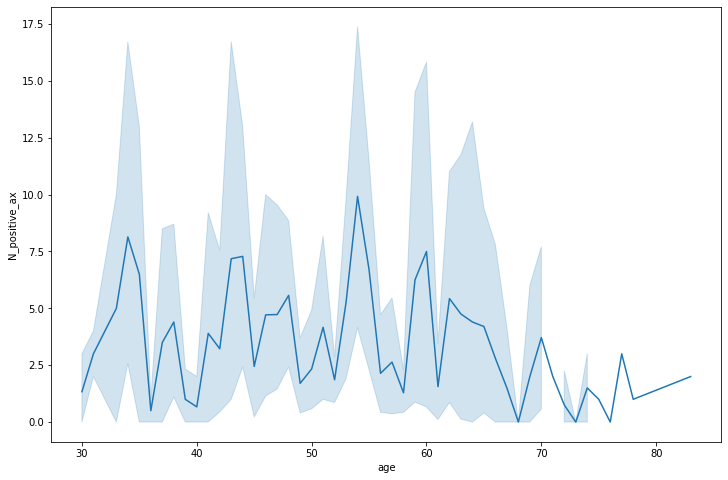

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="age", y="N_positive_ax", palette="light:#5A9")
plt.show()

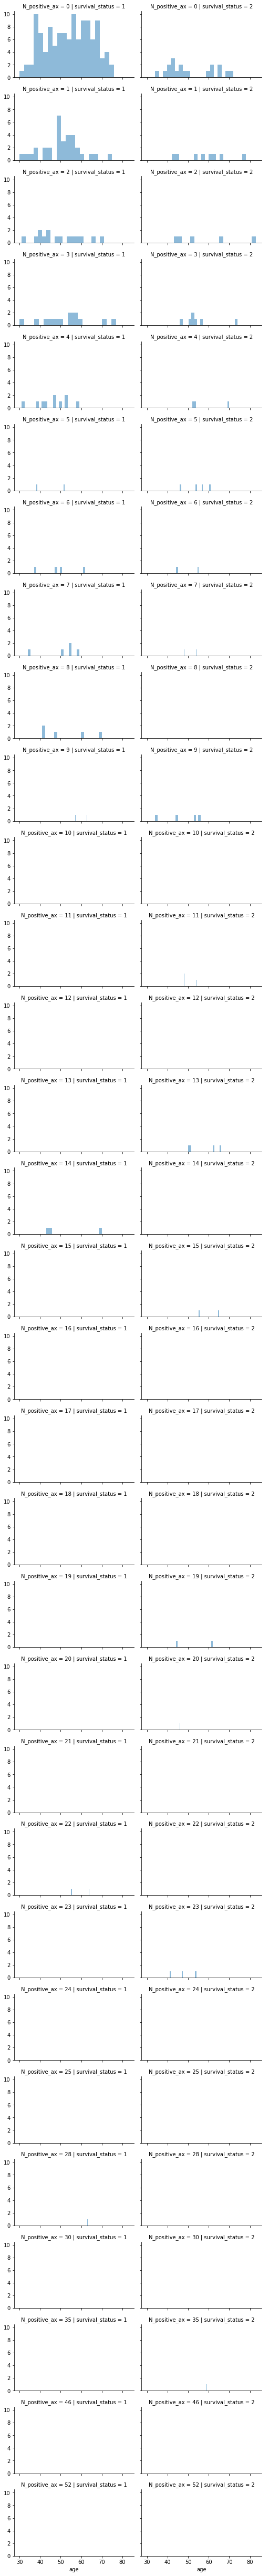

In [ ]:
grid = sns.FacetGrid(df, col='survival_status', row='N_positive_ax', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

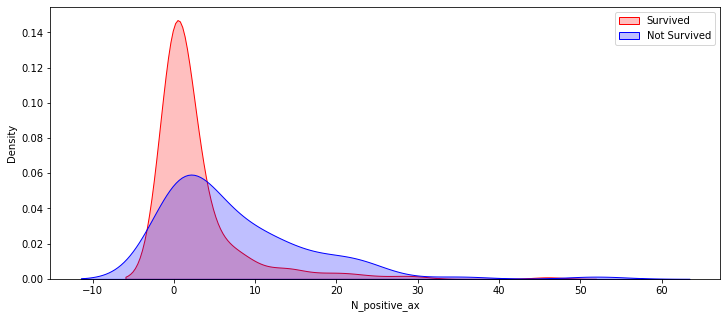

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(df.loc[df['survival_status'] == 1]['N_positive_ax'], color='r', shade=True, Label='Survived')
sns.kdeplot(df.loc[df['survival_status'] == 2]['N_positive_ax'], color='b', shade=True, Label='Not Survived')
plt.legend()
plt.show()  

## Summary



1.   There is no correlation between patients' age at surgery and how many stains they had
2.   Patients who had fewer cancer stains survived more than the rest



# Preprocessing

## Drop duplicate values

In [ ]:
df.drop_duplicates(keep='last', inplace=True)

## Feature Engineering

### Binning column age

In [ ]:
df['age'] = df['age'].astype(int)
df.loc[ df['age'] <= 30, 'age'] = 0
df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age'] = 1
df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age'] = 2
df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age'] = 3
df.loc[(df['age'] > 60) & (df['age'] <= 70), 'age'] = 4
df.loc[(df['age'] > 70) & (df['age'] <= 80), 'age'] = 5
df.loc[ df['age'] > 80, 'age'] = 6

In [ ]:
df[['age']].value_counts()

age
3      89
2      88
4      57
1      38
5      13
0       3
6       1
dtype: int64

### Binning column "patient year"

In [ ]:
df['patient year'] = df['patient year'].astype(int)
df.loc[ df['patient year'] <= 58, 'patient year'] = 0
df.loc[(df['patient year'] > 58) & (df['patient year'] <= 63), 'patient year'] = 1
df.loc[(df['patient year'] > 63) & (df['patient year'] <= 68), 'patient year'] = 2
df.loc[(df['patient year'] > 68) & (df['patient year'] <= 73), 'patient year'] = 3
df.loc[ df['patient year'] > 73, 'patient year'] = 4

In [ ]:
df['patient year'].value_counts()

1    125
2    119
0     34
3     11
Name: patient year, dtype: int64

## Checking for Imbalance Dataset

In [ ]:
df['survival_status'].value_counts()

1    210
2     79
Name: survival_status, dtype: int64

## TTS

In [ ]:
X = df.drop(["survival_status"],1)
y = df['survival_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 123)
print(X_train.shape, y_train.shape)
print(y_train.value_counts())
print(X_test.shape, y_test.shape)
print(y_test.value_counts())

(216, 3) (216,)
1    152
2     64
Name: survival_status, dtype: int64
(73, 3) (73,)
1    58
2    15
Name: survival_status, dtype: int64


## Handling Imbalance Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
oversample = SMOTE(random_state=123)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1123)

print("origin")
print(X_train.shape, y_train.shape)
print(y_train.value_counts())

print("oversample")
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)
print(X_train_o.shape, y_train_o.shape)
unique_elements, counts_elements = np.unique(y_train_o, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

print("undersample")
X_train_u, y_train_u = undersample.fit_resample(X_train, y_train)
print(X_train_u.shape, y_train_u.shape)
unique_elements, counts_elements = np.unique(y_train_u, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

data_train = {"origin":{"X_train":X_train, "y_train": y_train}, 
                   "oversample":{"X_train":X_train_o, "y_train": y_train_o},
                  "undersample":{"X_train":X_train_u, "y_train": y_train_u}}

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


origin
(216, 3) (216,)
1    152
2     64
Name: survival_status, dtype: int64
oversample
(304, 3) (304,)
[[  1   2]
 [152 152]]
undersample
(128, 3) (128,)
[[ 1  2]
 [64 64]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Modeling

In [ ]:
def eval_model(model,X_test,y_test, X_train, y_train):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Train Score")
    print(classification_report(y_train,y_train_pred))
    print("Test Score")
    print(classification_report(y_test,y_pred))
    return recall_score(y_test,y_pred)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, f1_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score

highest_score = 0
highest_score_dt = ""
dtree = DecisionTreeClassifier()
for dt in data_train:
    print(dt)
    dtree.fit(data_train[dt]['X_train'], data_train[dt]['y_train'])
    score = eval_model(dtree,X_test,y_test, data_train[dt]['X_train'], data_train[dt]['y_train'])
    print("recall score:",score)
    if(score > highest_score):
        highest_score = score
        highest_score_dt = dt
    print("=============")

X_train = data_train[highest_score_dt]['X_train']
y_train = data_train[highest_score_dt]['y_train']

origin
Train Score
              precision    recall  f1-score   support

           1       0.88      0.99      0.93       152
           2       0.96      0.67      0.79        64

    accuracy                           0.89       216
   macro avg       0.92      0.83      0.86       216
weighted avg       0.90      0.89      0.89       216

Test Score
              precision    recall  f1-score   support

           1       0.87      0.78      0.82        58
           2       0.38      0.53      0.44        15

    accuracy                           0.73        73
   macro avg       0.62      0.65      0.63        73
weighted avg       0.77      0.73      0.74        73

recall score: 0.7758620689655172
oversample
Train Score
              precision    recall  f1-score   support

           1       0.75      0.94      0.84       152
           2       0.92      0.69      0.79       152

    accuracy                           0.82       304
   macro avg       0.84      0.82      0.8

The best dataset to use with highest recall score is the original one

### KFold Validation

In [ ]:
dtree = DecisionTreeClassifier()
scores = cross_val_score(dtree, X_train, y_train, cv=150, scoring = "recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 64 members, which is less than n_splits=150.
  % (min_groups, self.n_splits)), UserWarning)


Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1.]
Mean: 0.8066666666666666
Standard Deviation: 0.39491208585653026


### ROC AUC

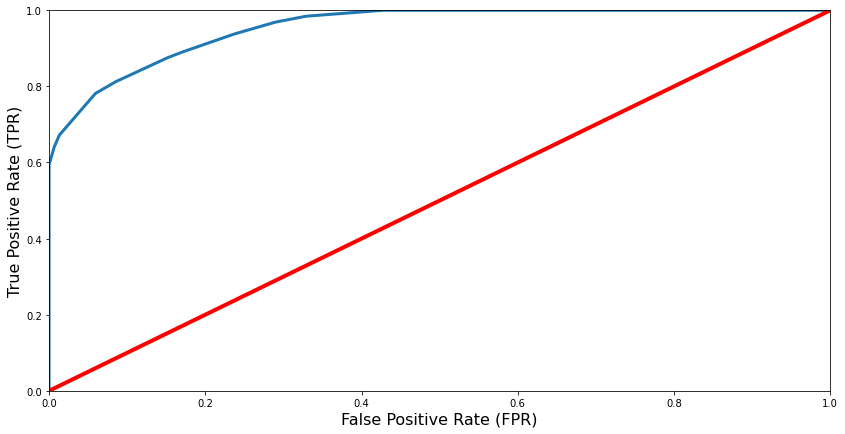

In [ ]:
dtree.fit(X_train, y_train)
# compute true positive rate and false positive rate
y_scores = dtree.predict_proba(X_train)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_train), y_scores, pos_label=2)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC AUC Score:", r_a_score)

ROC AUC Score: 0.954872532894737


## Predict test dataset

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1])

## Confusion Matrix 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(dtree, X_test, y_test, cv=15)
confusion_matrix(y_test, predictions)

array([[44, 14],
       [14,  1]])

## Classification Report for dataset test

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.76      0.81        58
           2       0.36      0.53      0.43        15

    accuracy                           0.71        73
   macro avg       0.61      0.65      0.62        73
weighted avg       0.76      0.71      0.73        73



## Result of dataset test prediction

In [ ]:
df_test = X_test.join(pd.DataFrame({"survival_status_true":y_test, "survival_status_pred": y_pred}))
df_test

,age,patient year,N_positive_ax,survival_status_true,survival_status_pred
268,4,0,0,2,2
190,3,2,9,2,1
197,3,1,5,2,2
257,4,2,0,1,1
262,4,0,0,1,2
...,...,...,...,...,...
270,4,0,0,1,2
139,3,1,1,1,1
212,3,0,0,1,1
228,3,2,0,1,1


## how well does the model predict positive/negatif targets?

The model can predict positive targets (1) better than negative targets (2). This is natural because positive targets are more dominant.
Based on the recall score the model can predict a positive target of about 78% and 53% for a negative target